### Sentiment Analysis on Weather Dataset <br> Pre-trained Models <br> VADER, TextBlob, and Flair <br> With and Without Stopwords

#### Importing Necessary Packages and Loading Data

In [1]:
import pandas as pd  
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import math

df = pd.read_csv('weather-agg-DFE.csv')

In [2]:
df.head()
df['text'] = df['tweet_text']
df.head()

,_unit_id,_canary,_unit_state,_trusted_judgments,_last_judgment_at,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,gold_answer,tweet_id,tweet_text,text
0,314960380,NaN,finalized,20,8/24/13 0:21,Positive,0.8439,NaN,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs on the grill last night was am...
1,314960381,NaN,finalized,20,8/24/13 0:49,Negative,0.6963,NaN,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And the weather makes ...
2,314960382,NaN,finalized,20,8/24/13 0:55,Neutral / author is just sharing information,0.8802,NaN,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,314960383,NaN,finalized,20,8/24/13 0:48,Positive,0.6897,NaN,82843785,Im going to lunch early today. The weather i...,Im going to lunch early today. The weather i...
4,314960384,NaN,finalized,20,8/24/13 1:19,Neutral / author is just sharing information,0.6153,NaN,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   _unit_id                                                                        1000 non-null   int64  
 1   _canary                                                                         0 non-null      float64
 2   _unit_state                                                                     1000 non-null   object 
 3   _trusted_judgments                                                              1000 non-null   int64  
 4   _last_judgment_at                                                               1000 non-null   object 
 5   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 6   what_emotion_does

In [33]:
df=df.drop(columns=['_canary', 'gold_answer', 'tweet_text','_unit_id','_unit_state','_trusted_judgments','_last_judgment_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [34]:
# convert text column to string for easier processing
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             1000 non-null   object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  1000 non-null   float64
 2   tweet_id                                                                        1000 non-null   int64  
 3   text                                                                            1000 non-null   string 
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 31.4+ KB


In [35]:
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Tweet not related to weather condition          235
Positive                                        231
I can't tell                                      2
Name: count, dtype: int64

In [36]:
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != 'Tweet not related to weather condition']
df = df[df.what_emotion_does_the_author_express_specifically_about_the_weather != "I can't tell"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   what_emotion_does_the_author_express_specifically_about_the_weather             763 non-null    object 
 1   what_emotion_does_the_author_express_specifically_about_the_weather:confidence  763 non-null    float64
 2   tweet_id                                                                        763 non-null    int64  
 3   text                                                                            763 non-null    string 
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 29.8+ KB


In [37]:
df['what_emotion_does_the_author_express_specifically_about_the_weather'].value_counts()

what_emotion_does_the_author_express_specifically_about_the_weather
Negative                                        271
Neutral / author is just sharing information    261
Positive                                        231
Name: count, dtype: int64

In [38]:
df = df.replace("Negative", -1)
df = df.replace("Neutral / author is just sharing information", 0)
df = df.replace("Positive", 1)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather': "Label"}, inplace=True)
df.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather:confidence':"Label_Confidence"}, inplace=True)

In [39]:
df.head()

,Label,Label_Confidence,tweet_id,text
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,1,0.6897,82843785,Im going to lunch early today. The weather i...
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...


#### Adding a Column for Text without Stopwords

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['no_stop'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Label,Label_Confidence,tweet_id,text,no_stop
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs grill last night amazing! I'm ...
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And weather makes even...
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 4:21PM CDT ex...
3,1,0.6897,82843785,Im going to lunch early today. The weather i...,Im going lunch early today. The weather nice o...
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...


#### VADER Sentiment Analysis

In [41]:
import nltk

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# adding the predictions as a column in dataset
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>=0.05):
        sentiment=1
    elif(output_dict['compound']<=-0.05):
        sentiment=-1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
df['Vader_Prediction']=df['text'].apply(predict_sentiment)
df.sample(5)

df['NSVader_Prediction']=df['no_stop'].apply(predict_sentiment)
df.sample(5)

,Label,Label_Confidence,tweet_id,text,no_stop,Vader_Prediction,NSVader_Prediction
813,0,0.8191,83258489,"Mostly sunny this afternoon, high 84 (29 C). ...","Mostly sunny afternoon, high 84 (29 C). Low 66...",1,1
666,1,0.9189,83268491,The sunshine makes me happy.,The sunshine makes happy.,1,1
331,0,0.8913,81177836,87.4F (Feels: 95.3F) - Humidity: 63% - Wind: 9...,87.4F (Feels: 95.3F) - Humidity: 63% - Wind: 9...,-1,-1
763,1,0.8246,82676738,"Sitting on the front porch drinking coffee, wa...","Sitting front porch drinking coffee, watching ...",1,1
799,-1,0.8471,82509678,i want to go out..but its cold and yucky out s...,want go out..but cold yucky idk,-1,-1


In [43]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df['Label'],df['Vader_Prediction'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['Vader_Prediction']))

Accuracy: 0.5976408912188729

              precision    recall  f1-score   support

          -1       0.62      0.46      0.53       271
           0       0.66      0.47      0.55       261
           1       0.56      0.90      0.69       231

    accuracy                           0.60       763
   macro avg       0.61      0.61      0.59       763
weighted avg       0.61      0.60      0.58       763



In [44]:
accuracy = accuracy_score(df['Label'],df['NSVader_Prediction'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['NSVader_Prediction']))

Accuracy: 0.5937090432503277

              precision    recall  f1-score   support

          -1       0.61      0.45      0.52       271
           0       0.65      0.47      0.55       261
           1       0.55      0.90      0.69       231

    accuracy                           0.59       763
   macro avg       0.61      0.61      0.58       763
weighted avg       0.61      0.59      0.58       763



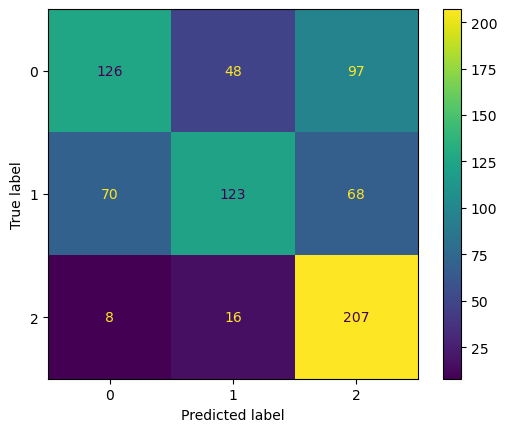

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['Label'], df['Vader_Prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

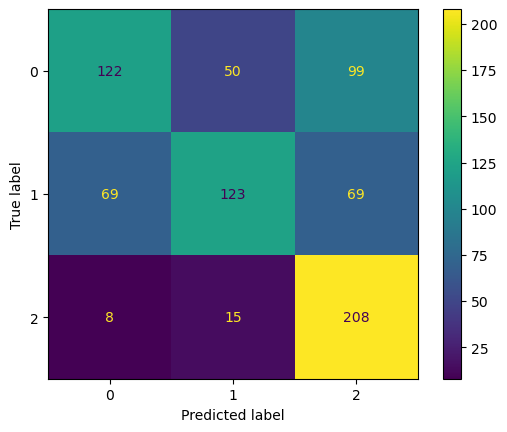

In [45]:
cm = confusion_matrix(df['Label'], df['NSVader_Prediction'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### TextBlob Sentiment Analysis

In [46]:
from textblob import TextBlob

In [48]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] =    text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

In [47]:
def NSsentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['NSTextBlob_Subjectivity'] =    text['no_stop'].apply(getSubjectivity)
 text ['NSTextBlob_Polarity'] = text['no_stop'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 text ['NSTextBlob_Analysis'] = text  ['NSTextBlob_Polarity'].apply(getAnalysis )
 return text

In [49]:
df = sentiment_analysis(df)
df = NSsentiment_analysis(df)

In [50]:
df.head()

,Label,Label_Confidence,tweet_id,text,no_stop,Vader_Prediction,NSVader_Prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,NSTextBlob_Subjectivity,NSTextBlob_Polarity,NSTextBlob_Analysis
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs grill last night amazing! I'm ...,1,1,0.741667,0.312500,1,0.741667,0.312500,1
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And weather makes even...,-1,-1,0.600000,-0.500000,-1,0.600000,-0.500000,-1
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 4:21PM CDT ex...,-1,-1,0.000000,0.000000,0,0.000000,0.000000,0
3,1,0.6897,82843785,Im going to lunch early today. The weather i...,Im going lunch early today. The weather nice o...,1,1,0.636111,0.388889,1,0.636111,0.388889,1
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...,0,0,0.000000,0.000000,0,0.000000,0.000000,0


In [51]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df['Label'],df['TextBlob_Analysis'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['TextBlob_Analysis']))

Accuracy: 0.5766710353866317

              precision    recall  f1-score   support

          -1       0.69      0.39      0.50       271
           0       0.58      0.58      0.58       261
           1       0.53      0.79      0.63       231

    accuracy                           0.58       763
   macro avg       0.60      0.59      0.57       763
weighted avg       0.60      0.58      0.57       763



In [52]:
accuracy = accuracy_score(df['Label'],df['NSTextBlob_Analysis'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['NSTextBlob_Analysis']))

Accuracy: 0.5727391874180865

              precision    recall  f1-score   support

          -1       0.69      0.37      0.48       271
           0       0.57      0.59      0.58       261
           1       0.53      0.79      0.63       231

    accuracy                           0.57       763
   macro avg       0.59      0.58      0.56       763
weighted avg       0.60      0.57      0.56       763



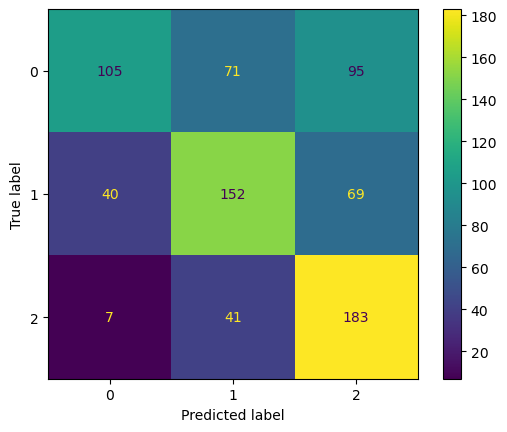

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['Label'], df['TextBlob_Analysis'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

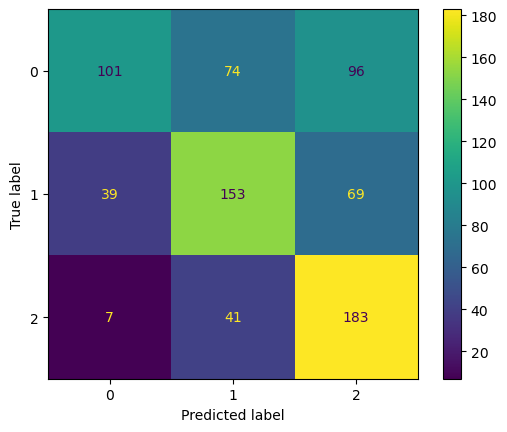

In [54]:
cm = confusion_matrix(df['Label'], df['NSTextBlob_Analysis'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Flair Sentiment Analysis

In [21]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

sia = TextClassifier.load('en-sentiment')

In [22]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    elif "NEGATIVE" in str(score):
        return -1
    else:
        return 0

In [55]:
df['Flair_Sentiment'] = df['text'].apply(lambda x: sentiment_Flair(x))
df['NSFlair_Sentiment'] = df['no_stop'].apply(lambda x: sentiment_Flair(x))

In [56]:
df.head()

,Label,Label_Confidence,tweet_id,text,no_stop,Vader_Prediction,NSVader_Prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,NSTextBlob_Subjectivity,NSTextBlob_Polarity,NSTextBlob_Analysis,Flair_Sentiment,NSFlair_Sentiment
0,1,0.8439,81990560,Grilling kabobs on the grill last night was am...,Grilling kabobs grill last night amazing! I'm ...,1,1,0.741667,0.312500,1,0.741667,0.312500,1,1,1
1,-1,0.6963,84314377,The slowest day ever !! And the weather makes ...,The slowest day ever !! And weather makes even...,-1,-1,0.600000,-0.500000,-1,0.600000,-0.500000,-1,-1,-1
2,0,0.8802,82846118,Fire Weather Watch issued May 17 at 4:21PM CDT...,Fire Weather Watch issued May 17 4:21PM CDT ex...,-1,-1,0.000000,0.000000,0,0.000000,0.000000,0,-1,-1
3,1,0.6897,82843785,Im going to lunch early today. The weather i...,Im going lunch early today. The weather nice o...,1,1,0.636111,0.388889,1,0.636111,0.388889,1,1,1
4,0,0.6153,82840144,Weekend Weather Causes Delays In I-270 Bridge ...,Weekend Weather Causes Delays In I-270 Bridge ...,0,0,0.000000,0.000000,0,0.000000,0.000000,0,-1,-1


In [57]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(df['Label'],df['Flair_Sentiment'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['Flair_Sentiment']))

Accuracy: 0.5045871559633027

              precision    recall  f1-score   support

          -1       0.48      0.69      0.56       271
           0       0.00      0.00      0.00       261
           1       0.53      0.86      0.66       231

    accuracy                           0.50       763
   macro avg       0.34      0.52      0.41       763
weighted avg       0.33      0.50      0.40       763



/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [58]:
accuracy = accuracy_score(df['Label'],df['NSFlair_Sentiment'])

print("Accuracy: {}\n".format(accuracy))

print(classification_report(df['Label'],df['NSFlair_Sentiment']))

Accuracy: 0.5006553079947575

              precision    recall  f1-score   support

          -1       0.46      0.65      0.54       271
           0       0.00      0.00      0.00       261
           1       0.54      0.89      0.67       231

    accuracy                           0.50       763
   macro avg       0.33      0.51      0.40       763
weighted avg       0.33      0.50      0.40       763



/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tessanderson/anaconda3/envs/thesiswork/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

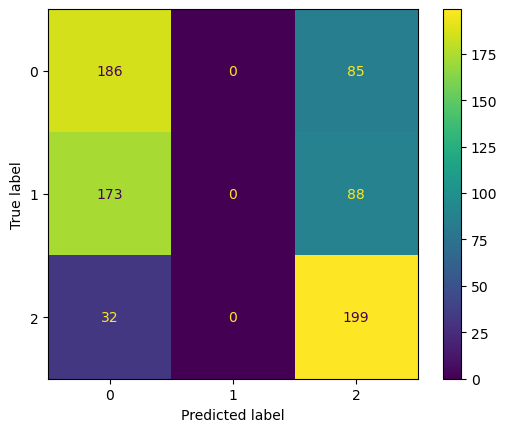

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['Label'], df['Flair_Sentiment'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

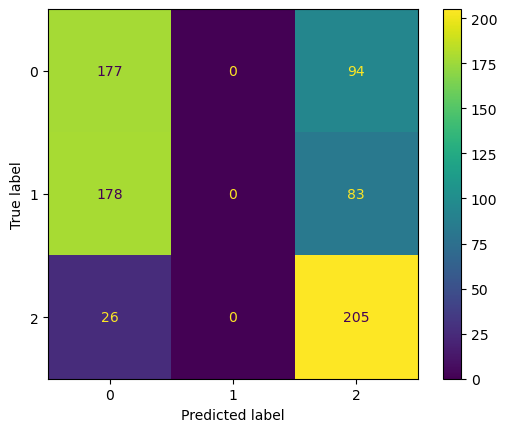

In [60]:
cm = confusion_matrix(df['Label'], df['NSFlair_Sentiment'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()